In [ ]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 50000)/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/sample_data/train.csv")
dataset.head(10)



,author,real_label,label,review,product_domain,overall,#words
0,A11OTLEDSW8ZXD,44,44,I have always been a fan of the Lewis and Clar...,books.json.gz,5.0,529
1,A11OTLEDSW8ZXD,44,44,I started reading this book during a three-wee...,books.json.gz,4.0,193
2,A11OTLEDSW8ZXD,44,44,This cable is well-made and feels sturdier tha...,cell_phones_and_accessories.json.gz,4.0,109
3,A11OTLEDSW8ZXD,44,44,"This kibble is expensive, but the cats like it...",pet_supplies.json.gz,5.0,100
4,A11OTLEDSW8ZXD,44,44,This device is exactly what we needed for our ...,electronics.json.gz,4.0,197
5,A11OTLEDSW8ZXD,44,44,These beef hides are quite the treat. I like ...,pet_supplies.json.gz,5.0,130
6,A11OTLEDSW8ZXD,44,44,Reading this memoir was quite a surprise. It ...,books.json.gz,4.0,393
7,A11OTLEDSW8ZXD,44,44,Being a born Hoosier and having graduated from...,books.json.gz,4.0,382
8,A11OTLEDSW8ZXD,44,44,This is a surprisingly good first novel. Whil...,books.json.gz,5.0,140
9,A11OTLEDSW8ZXD,44,44,My first impression of this lens was its weigh...,electronics.json.gz,3.0,348


In [ ]:
len(dataset.real_label.unique())

100

In [ ]:
dataset.groupby(by='real_label').count()

,author,label,review,product_domain,overall,#words
real_label,,,,,,
0,500,500,500,500,500,500
1,500,500,500,500,500,500
2,500,500,500,500,500,500
3,500,500,500,500,500,500
4,500,500,500,500,500,500
...,...,...,...,...,...,...
95,500,500,500,500,500,500
96,500,500,500,500,500,500
97,500,500,500,500,500,500


In [ ]:
dataset.loc[:,['real_label','review']]

,real_label,review
0,44,I have always been a fan of the Lewis and Clar...
1,44,I started reading this book during a three-wee...
2,44,This cable is well-made and feels sturdier tha...
3,44,"This kibble is expensive, but the cats like it..."
4,44,This device is exactly what we needed for our ...
...,...,...
49995,46,Dumbo is one of disney's most beloved and clas...
49996,46,I haven't played anygood sport games yet and i...
49997,46,"This game is loads of fun, i really liked this..."
49998,46,Gabriel is one of the funniest comedians i've ...


In [ ]:
import regex as re

In [ ]:
dataset['flag']=dataset.loc[:,['real_label','review']].apply(lambda x: re.match("UPDATE*",x['review']),axis=1 )

In [ ]:
#removing updated records

dataset_filtered=dataset.loc[:,['real_label','review','flag']].loc[dataset['flag'].isin([None])]

In [ ]:
dataset_filtered.drop('flag',axis=1,inplace=True)

In [ ]:
dataset_filtered['flag']=dataset_filtered.loc[:,['real_label','review']].apply(lambda x: re.match("<div*",x['review']),axis=1 )
dataset_filtered.loc[:,['real_label','review','flag']].loc[~dataset_filtered['flag'].isin([None])]

,real_label,review,flag
450,44,"<div id=""video-block-R2SQB0OUB1NBH5"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
2809,0,"<div id=""video-block-R1VMY3B2ETH5QP"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
2821,0,"<div id=""video-block-R3NJKKD6S2WID6"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
2952,0,"<div id=""video-block-R33S0CYT44UQX1"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
2970,0,"<div id=""video-block-R5L2E0WNGPMI7"" class=""a-s...","<regex.Match object; span=(0, 4), match='<div'>"
...,...,...,...
44995,40,"<div id=""video-block-R1R0HO8E534KBL"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
44996,40,"<div id=""video-block-R1ZAATOSO22JSK"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
44999,40,"<div id=""video-block-R306912UZ65A6Y"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"
45555,69,"<div id=""video-block-R2NVHO9ID4JNHG"" class=""a-...","<regex.Match object; span=(0, 4), match='<div'>"


In [ ]:
dataset_filtered.loc[:,['real_label','review','flag']].loc[~dataset_filtered['flag'].isin([None])].groupby('real_label').count()

,review,flag
real_label,,
0,4,4
1,1,1
5,1,1
7,178,178
8,1,1
9,35,35
10,22,22
14,3,3
16,170,170


In [ ]:
dataset_filtered.drop('flag',axis=1,inplace=True)

In [ ]:
dataset_filtered.head(5)

,real_label,review
0,44,I have always been a fan of the Lewis and Clar...
1,44,I started reading this book during a three-wee...
2,44,This cable is well-made and feels sturdier tha...
3,44,"This kibble is expensive, but the cats like it..."
4,44,This device is exactly what we needed for our ...


In [ ]:
dataset_filtered.groupby('real_label').count()

,review
real_label,
0,497
1,500
2,500
3,500
4,500
...,...
95,500
96,500
97,500


In [ ]:
#Input dataset
dataset_filtered

,real_label,review
0,44,I have always been a fan of the Lewis and Clar...
1,44,I started reading this book during a three-wee...
2,44,This cable is well-made and feels sturdier tha...
3,44,"This kibble is expensive, but the cats like it..."
4,44,This device is exactly what we needed for our ...
...,...,...
49995,46,Dumbo is one of disney's most beloved and clas...
49996,46,I haven't played anygood sport games yet and i...
49997,46,"This game is loads of fun, i really liked this..."
49998,46,Gabriel is one of the funniest comedians i've ...


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    n_gpu=torch.cuda.device_count()

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import RobertaTokenizer,BertTokenizer
# Load the tokenizer.
print('Loading Roberta tokenizer...')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)


Loading Roberta tokenizer...


In [ ]:
#Max length

max_len = 0
len_list=[]
# For every sentence...
for r in dataset_filtered.values:
    #print(r)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(r[1], add_special_tokens=True)
    len_list.append([r[0],len(input_ids)])
    
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length in training data: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (671 > 512). Running this sequence through the model will result in indexing errors


Max sentence length in training data:  6643


In [ ]:
len_df=pd.DataFrame(len_list)
len_df.columns=['Lable','str_len']

In [ ]:
len_df.loc[len_df['str_len'].values>2000]

,Lable,str_len
1021,55,2271
1092,55,2281
1143,55,2533
1155,55,2431
1168,55,2037
...,...,...
47926,75,2999
47932,75,2323
47960,75,2098
47961,75,2535


In [ ]:
print(len(len_df))
len_df.groupby('Lable').count()

49967


,str_len
Lable,
0,497
1,500
2,500
3,500
4,500
...,...
95,500
96,500
97,500


In [ ]:
len_df_filtered=len_df.loc[len_df['str_len'].values<=512]
print(len(len_df_filtered))
len_df_filtered.groupby('Lable').count()

39301


,str_len
Lable,
0,476
1,495
2,484
3,235
4,473
...,...
95,494
96,500
97,330


In [ ]:
dataset_filtered['num_sentences']=dataset_filtered.apply(lambda x:len(x.values[1].split('\n')),axis=1)

In [ ]:
np.percentile(dataset_filtered.num_sentences.values,95)

23.0

In [ ]:
dataset_filtered.loc[dataset_filtered['num_sentences']>100]

,real_label,review,num_sentences
3021,43,"With HOLLYWOOD CLASSICS 100 MOVIE PACK, MILL C...",207
3023,43,Based on current polling numbers at a film res...,105
3062,43,The majority of films in the ACTION CLASSICS 5...,105
3183,43,WESTERN CLASSICS 100 MOVIE PACK is a set of 24...,106
3361,43,The CRIME CLASSICS 50 MOVIE PACK has one film ...,109
4789,68,Book #5 in the action-adventure series first p...,102
10224,7,"<div id=""video-block-R2SS5UEOOTKZG1"" class=""a-...",114
11119,91,"With many books, translations are negligible, ...",169
14002,74,Obama's Wars by Bob Woodward\nSimon and Schust...,147
14025,74,"The Baby Boomer Generation will be the new\n""T...",113


In [ ]:
dataset_filtered.columns

Index(['real_label', 'review', 'num_sentences'], dtype='object')

In [ ]:
labels = dataset_filtered.real_label.values
sentences=dataset_filtered.review.values

In [ ]:
np.unique(dataset_filtered.real_label.values)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
#labels = torch.tensor(labels)

In [ ]:
#labels = torch.nn.functional.one_hot(labels, num_classes = 100).to(torch.float)
#print(labels)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  I have always been a fan of the Lewis and Clark (L&C) expedition and have read numerous books on that era.  I even road tripped along the Missouri River to the river's source in Montana (bypassing North Dakota and eastern Montana due to repeated tornadoes that summer), stopping along all the historical signs.  I'm a fan because I understand the courage it took to explore unknown lands with potential violent inhabitants, but I also understand the significance of American expansion to the Pacific via the Northwest passage.  Opening up these lands is one of Jefferson's biggest legacies as president.

What Julie Fenster does here is not just summarize the L&C expedition, though.  She describes the young America at the turn of the 19th century.  Pioneers were moving westward, but Spain controlled the western lands. She gives short biographies of the players, the governors, kings and explorers of the era.  It was a time of great hostilities.  Fenster portrays Jefferson as a man f

In [ ]:
input_ids = []
attention_masks = []

# For every sentence...
for s in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        s,                      # Sentence to encode.
                        truncation=True,
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


In [ ]:
input_ids[0]

tensor([    0,   100,    33,   460,    57,    10,  2378,     9,     5,  3577,
            8,  4433,    36,   574,   947,   347,    43, 25512,     8,    33,
         1166,  3617,  2799,    15,    14,  3567,     4,  1437,    38,   190,
          921,  7182,  5686,   552,     5,  4630,  1995,     7,     5,  4908,
           18,  1300,    11,  8920,    36,  1409, 10212,   154,   369,  6223,
            8,  4580,  8920,   528,     7,  6636,  9007, 24263,    14,  1035,
          238,  8197,   552,    70,     5,  4566,  2434,     4,  1437,    38,
          437,    10,  2378,   142,    38,  1346,     5,  9699,    24,   362,
            7,  5393,  4727,  8952,    19,   801,  4153, 24696,     6,    53,
           38,    67,  1346,     5, 11382,     9,   470,  2919,     7,     5,
         3073,  1241,     5,  8535,  9078,     4,  1437, 14491,    62,   209,
         8952,    16,    65,     9,  9033,    18,   934,  2985, 15668,    25,
          394,     4, 50118, 50118,  2264,  9786, 15615,  3121, 

In [ ]:
attention_masks[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

44,970 training samples
4,997 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
import torch.nn as nn
from transformers import RobertaForSequenceClassification,BertForSequenceClassification, AdamW, BertConfig

output_dir = '/content/drive/MyDrive/ASU/'
model = RobertaForSequenceClassification.from_pretrained(output_dir)
tokenizer = RobertaForSequenceClassification.from_pretrained(output_dir)
#model.classifier.out_proj = nn.Linear(model.classifier.out_proj.in_features, 101)
# Copy the model to the GPU.
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
from transformers import RobertaForSequenceClassification,BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 100, # The number of output labels--2 for binary classification.
             # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
#total_steps = len(train_dataloader) * epochs
gradient_accumulation_steps=1
n_gpu=1
#total_steps= ((len(train_dataloader) // (batch_size * max(1, n_gpu)))// gradient_accumulation_steps* float(epochs))
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        # b_input_ids = batch[0].to(device)
        # b_input_mask = batch[1].to(device)
        # b_labels = batch[2].to(device)
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        b_lables_pair_l2=[]

        arr_ind=[i for i in range(batch_size)]

        counter=0

        #print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

        #k=np.ceil((batch[0][0:1]+batch[0][1:2])/2)
        #avg_pair=k.type(torch.int64)
        #print(avg_pair[0])
        


        while(1):
          if len(set(arr_ind))==1:
            break
          ind1=np.random.choice(arr_ind)
          arr_ind.remove(ind1)
          ind2=np.random.choice(arr_ind)
          arr_ind.remove(ind2)
          
          if ind2!=ind1:
            b_lables_pair_l2.append([ind1,ind2])
          else:
            arr_ind.append(ind1)
            arr_ind.append(ind2)
          counter=counter+1

          if len(arr_ind)==8 or counter>50:
            break

        b_input_ids_l1 = torch.cat(tuple([batch[0][ind:ind+1] for ind in arr_ind])).to(device)
        b_input_mask_l1 = torch.cat(tuple([batch[1][ind:ind+1] for ind in arr_ind])).to(device)
        #b_labels_l1 = torch.cat(tuple([batch[2][ind] for ind in arr_ind]))
        b_labels_l1 = torch.cat(tuple([batch[2][ind:ind+1] for ind in arr_ind])).to(device)

        b_input_ids_l2=[]
        b_input_mask_l2=[]
        b_labels_l2=[]

        for ind_pair in b_lables_pair_l2:
          i=ind_pair[0]
          j=ind_pair[1]

          sum_pair=np.ceil((batch[0][i:i+1]+batch[0][j:j+1])/2)
          avg_pair=sum_pair.type(torch.int64)
          b_input_ids_l2.append(avg_pair)



          sum_pair_mask=np.ceil((batch[1][i:i+1]+batch[1][j:j+1])/2)
          avg_pair_mask=sum_pair_mask.type(torch.int64)

          b_input_mask_l2.append(avg_pair_mask)

          b_labels_l2.append(torch.tensor([100]))

        b_labels_l2 = torch.cat(tuple(b_labels_l2)).to(device)
        b_input_mask_l2 = torch.cat(tuple(b_input_mask_l2)).to(device)
        b_input_ids_l2 = torch.cat(tuple(b_input_ids_l2)).to(device)

        """print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

        print(b_labels_l2)
        print(b_input_ids_l2)
        print(b_input_mask_l2)
        break"""



        # print("b_input_ids",b_input_ids)
        # print("b_input_mask",b_input_mask)
        # print("b_labels",b_labels)
        # print("inference 0")

        # print("#####################################################")
      

        

        # print("b_input_ids_l1",b_input_ids_l1)
        # print("b_input_mask_l1",b_input_mask_l1)
        # print("b_labels_l1",b_labels_l1)
        # print("inference 2")

        # print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')



        # print("b_input_ids_l2",b_input_ids_l2)
        # print("b_input_mask_l2",b_input_mask_l2)
        # print("b_labels_l2",b_labels_l2)
        # print("inference 3")

        # print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')



       

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        # result = model(b_input_ids, 
        #                token_type_ids=None, 
        #                attention_mask=b_input_mask, 
        #                labels=b_labels,
        #                return_dict=True)
        
        # print("b_input_ids",b_input_ids)
        # print("b_input_mask",b_input_mask)
        # print("b_labels",b_labels)
        # print("inference 0")


        result1 = model(b_input_ids_l1, 
                       token_type_ids=None, 
                       attention_mask= b_input_mask_l1, 
                       labels=b_labels_l1,
                       return_dict=True)
        # print("b_input_ids_l1",b_input_ids_l1)
        # print("b_input_mask_l1",b_input_mask_l1)
        # print("b_labels_l1",b_labels_l1)
        # print("inference 2")


        # result2 = model(b_input_ids_l2, 
        #                token_type_ids=None, 
        #                attention_mask=b_input_mask_l2, 
        #                labels= b_labels_l2,
        #                return_dict=True)
        # print("b_input_ids_l2",b_input_ids_l2)
        # print("b_input_mask_l2",b_input_mask_l2)
        # print("b_labels_l2",b_labels_l2)
        # print("inference 3")
        loss = result1.loss
        logits = result1.logits
        B = logits[: , len(logits[0])-1:len(logits[0])].clone()
        # print(B)
        kthloss = -1 * torch.log(B)
        # print(kthloss)
        # loss1 = kthloss + loss
       # print(logits)
        # print("********************************************")
        # print(loss)
        # print(kthloss)
        kthloss = torch.sum(kthloss)
        # print(torch.sum(kthloss))
        # print("********************************************")
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()
        loss1 = loss + kthloss
        #loss1 = torch.add(loss, kthloss)
        # print("loss1 :", loss1)
        # Perform a backward pass to calculate the gradients.
        #loss1.backward()

        # lossss1 = result1.loss
        

        # lossss2 = result2.loss
        lossb= loss1
        lossb.backward()


        # loss1 = result1.loss
        # # loss2 = result2.loss
        # # loss= loss1 + loss2
        # loss= loss1
        # print("clear loss")
        # logits = result.logits
        # print("logits : ",logits)
        # print(len(logits))
        # print(len(logits[0]))
        

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        # loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
        


    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch    40  of  2,811.    Elapsed: 0:00:29.
  Batch    80  of  2,811.    Elapsed: 0:00:58.
  Batch   120  of  2,811.    Elapsed: 0:01:27.
  Batch   160  of  2,811.    Elapsed: 0:01:57.
  Batch   200  of  2,811.    Elapsed: 0:02:26.
  Batch   240  of  2,811.    Elapsed: 0:02:56.
  Batch   280  of  2,811.    Elapsed: 0:03:27.
  Batch   320  of  2,811.    Elapsed: 0:03:57.
  Batch   360  of  2,811.    Elapsed: 0:04:27.
  Batch   400  of  2,811.    Elapsed: 0:04:58.
  Batch   440  of  2,811.    Elapsed: 0:05:28.
  Batch   480  of  2,811.    Elapsed: 0:05:58.
  Batch   520  of  2,811.    Elapsed: 0:06:29.
  Batch   560  of  2,811.    Elapsed: 0:06:59.
  Batch   600  of  2,811.    Elapsed: 0:07:29.
  Batch   640  of  2,811.    Elapsed: 0:08:00.
  Batch   680  of  2,811.    Elapsed: 0:08:30.
  Batch   720  of  2,811.    Elapsed: 0:09:00.
  Batch   760  of  2,811.    Elapsed: 0:09:31.
  Batch   800  of  2,811.    Elapsed: 0:10:01.
  Batch   840  of

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/ASU/model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to /content/drive/MyDrive/ASU/model_save/


('/content/drive/MyDrive/ASU/model_save/tokenizer_config.json',
 '/content/drive/MyDrive/ASU/model_save/special_tokens_map.json',
 '/content/drive/MyDrive/ASU/model_save/vocab.json',
 '/content/drive/MyDrive/ASU/model_save/merges.txt',
 '/content/drive/MyDrive/ASU/model_save/added_tokens.json')

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.63,0.61,0.87,1:13:55,0:02:57


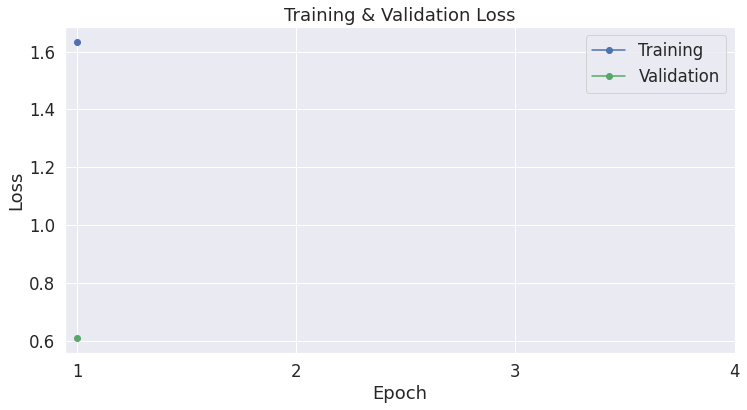

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import pandas as pd
import regex as re

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/MyDrive/ASU/ood_test_data_small.csv")



In [ ]:
df['flag']=df.loc[:,['real_label','review']].apply(lambda x: re.match("UPDATE*",x['review']),axis=1 )
#removing updated records

df=df.loc[:,['real_label','review','flag']].loc[df['flag'].isin([None])]
df.drop('flag',axis=1,inplace=True)

In [ ]:
df.head(10)

,real_label,review
0,44,"I bought this battery charger a year ago, when..."
1,44,I bought this because with four geriatric vehi...
2,44,I was a tad skeptical of the outcome after see...
3,44,I insist on every one of my vehicles to have a...
4,44,This is a very well-made top grain cow leather...
5,44,At first I was pleased to get this roller shad...
6,44,"This strap appears well-made, with inch-thick ..."
7,44,"For a quick, overall shine on chrome and plast..."
8,44,"This balaclava comes in a small, bubble-wrap p..."
9,44,This is an impressive car jump battery pack wi...


In [ ]:
df=df.loc[df.real_label.values<100]

In [ ]:
df.groupby(by='real_label').count()

,review
real_label,
0,99
1,100
2,100
3,100
4,100
...,...
95,100
96,100
97,100


In [ ]:

# Create sentence and label lists
#
#labels = df.real_label.values
#sentence1 = df.review.values
sentence1=sentences
labels = dataset_filtered.real_label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent1 in zip(sentence1):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent1,# Sentence to encode.
                        truncation=True,
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)



# Set the batch size.  
batch_size = 16

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  pred_labels = np.argmax(logits, axis=1)
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.extend(pred_labels.tolist())
  true_labels.extend(label_ids.tolist())

print('    DONE.')

Predicting labels for 49,967 test sentences...


In [ ]:
np.unique(predictions)

In [ ]:
np.unique(true_labels)

In [ ]:
import sklearn

In [ ]:
classification_metrics=sklearn.metrics.classification_report(true_labels, predictions, digits=100, output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

result_report= classification_report(true_labels, predictions, digits=100)
print(result_report)

                                                                                                      precision    recall  f1-score   support

                                                                                                   0  0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000        99
                                                                                                   1  0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000       100
               

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
brek

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/ASU/model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


In [ ]:
!ls -l --block-size=K ./model_save/

In [ ]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = RobertaForSequenceClassification.from_pretrained(output_dir)
tokenizer = RobertaForSequenceClassification.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
